## Case Study, Saddle Ridge fire

In [4]:
#!pip install twitterscraper

     |████████████████████████████████| 89 kB 883 kB/s eta 0:00:01
  Created wheel for twitterscraper: filename=twitterscraper-1.4.0-py3-none-any.whl size=11343 sha256=825ee89d581c6adcfe662ee223456de82ce4d6fb0809bb38dd8b48fb9886a55b
  Stored in directory: /Users/Sam/Library/Caches/pip/wheels/7c/4d/a2/aeb7b75536c106f13a5f9c598972faf9ba7b7221e957c7304d
Successfully built twitterscraper


## Getting twitter data

In [5]:
from twitterscraper import query_tweets
import datetime as dt
import pandas as pd
from bs4 import BeautifulSoup
import warnings
import regex as re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

INFO: {'User-Agent': 'Opera/9.80 (X11; Linux i686; Ubuntu/14.10) Presto/2.12.388 Version/12.16'}


In [6]:
def get_tweet_header(query, start_date, endding_date, limit_num = 1, language = "english"):
    """
    
    Pulls tweets from twitter ... and 
    
    
    Parameters: 
    
    query: the query statement we want to pull from twitter, must be in quotes.
    start_date: formated as a tuple, pulls from said start date. Format as i.e.: (2019, 10, 10).
    end_date: formated as a tuple, pulls from said start date, Format as i.e.: (2019, 10, 31).
    limit_num: the default is 2_000, idk what it does 
    language: the default is english, pulls only tweets in said language. 
    """
    
    
    #unpacks the date tuples to later be formated using the 
    start_yr, start_month, start_day = start_date 
    end_yr, end_month, end_day = endding_date

    #Reformats dates,unpacked above, into twitter query format
    begin_date = dt.date(start_yr, start_month, start_day)
    end_date = dt.date(end_yr, end_month, end_day)
    
    
    #Using try and except statements in cases there's any date or others issues
    
    try:

        #Pulling from twitter
        tweets = query_tweets(query, begindate = begin_date, enddate = end_date, limit = limit_num, lang = language)
        
        #Creates DataFrame From tweets
        
        twitter_df = pd.DataFrame(t.__dict__ for t in tweets)
    
        #Creates a column with the query name as it's value
    
        twitter_df['query'] = query
        
        
    except:
        print(f"An exception has been for {query}")
        
#     pd.concat([starter_df, twitter_df])
       
    return twitter_df

In [7]:
df = get_tweet_header("saddleridgefire", (2019, 10, 10), (2019, 10, 31))

INFO: queries: ['saddleridgefire since:2019-10-10 until:2019-10-11', 'saddleridgefire since:2019-10-11 until:2019-10-12', 'saddleridgefire since:2019-10-12 until:2019-10-13', 'saddleridgefire since:2019-10-13 until:2019-10-14', 'saddleridgefire since:2019-10-14 until:2019-10-15', 'saddleridgefire since:2019-10-15 until:2019-10-16', 'saddleridgefire since:2019-10-16 until:2019-10-17', 'saddleridgefire since:2019-10-17 until:2019-10-18', 'saddleridgefire since:2019-10-18 until:2019-10-19', 'saddleridgefire since:2019-10-19 until:2019-10-20', 'saddleridgefire since:2019-10-20 until:2019-10-21', 'saddleridgefire since:2019-10-21 until:2019-10-22', 'saddleridgefire since:2019-10-22 until:2019-10-23', 'saddleridgefire since:2019-10-23 until:2019-10-24', 'saddleridgefire since:2019-10-24 until:2019-10-25', 'saddleridgefire since:2019-10-25 until:2019-10-26', 'saddleridgefire since:2019-10-26 until:2019-10-27', 'saddleridgefire since:2019-10-27 until:2019-10-28', 'saddleridgefire since:2019-10

In [8]:
df.head()

,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,links,...,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users,query
0,EPCFIRM,EPCF #GreenNewDeal #SunriseMovement,836834627771850752,1188564512669962240,/EPCFIRM/status/1188564512669962240,2019-10-27 21:13:56,1572210836,Our hearts go out to Californians affected by ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,[https://pbs.twimg.com/media/EH6hH4FVAAA6ZA_.jpg],,7,1,1,True,False,,[],saddleridgefire
1,jsingpubhealth,Jason “Future Power Drunk Epidemiologist” Singson,3320904614,1188545671076298752,/jsingpubhealth/status/1188545671076298752,2019-10-27 19:59:04,1572206344,"From the #SaddleridgeFire to the #KincadeFire,...","<p class=""TweetTextSize js-tweet-text tweet-te...",[https://twitter.com/CAgovernor/status/1188523...,...,[],,1,0,0,False,False,,[],saddleridgefire
2,BrandyCGrote,Brandy Grote,898902973,1188517925503635456,/BrandyCGrote/status/1188517925503635456,2019-10-27 18:08:49,1572199729,Our #SaddleridgeFire leaped a 12 lane major fr...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,[],,1,1,0,False,True,1188495676969119744,"[{'screen_name': 'BillMendocino', 'user_id': '...",saddleridgefire
3,mlzema,Mark In SoCal,18340526,1188515108562931714,/mlzema/status/1188515108562931714,2019-10-27 17:57:38,1572199058,"Good Morning, Sam!\nAll is well here. However,...","<p class=""TweetTextSize js-tweet-text tweet-te...",[https://twitter.com/Sam17970863/status/118851...,...,[],,1,0,0,False,False,,[],saddleridgefire
4,LVTIA,LVTIA,87142711,1188502337867829248,/LVTIA/status/1188502337867829248,2019-10-27 17:06:53,1572196013,Was your property or home damaged by the #Sadd...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[https://www.211la.org/fire-saddleridge],...,[],,0,0,0,False,False,,[],saddleridgefire


In [9]:
starter_df = df.drop(df.index[0:320])

In [10]:
def get_tweets(query, start_date, endding_date, limit_num = 1, language = "english"):
    """
    
    Pulls tweets from twitter ... and 
    
    
    Parameters: 
    
    query: the query statement we want to pull from twitter, must be in quotes.
    start_date: formated as a tuple, pulls from said start date. Format as i.e.: (2019, 10, 10).
    end_date: formated as a tuple, pulls from said start date, Format as i.e.: (2019, 10, 31).
    limit_num: the default is 2_000, idk what it does 
    language: the default is english, pulls only tweets in said language. 
    """
    
    global starter_df
    
    #unpacks the date tuples to later be formated using the 
    start_yr, start_month, start_day = start_date 
    end_yr, end_month, end_day = endding_date

    #Reformats dates,unpacked above, into twitter query format
    begin_date = dt.date(start_yr, start_month, start_day)
    end_date = dt.date(end_yr, end_month, end_day)
    
    
    #Using try and except statements in cases there's any date or others issues
    
    try:

        #Pulling from twitter
        tweets = query_tweets(query, begindate = begin_date, enddate = end_date, limit = limit_num, lang = language)
        
        #Creates DataFrame From tweets
        twitter_df = pd.DataFrame(t.__dict__ for t in tweets)
    
        #Creates a column with the query name as it's value
        twitter_df['query'] = query
        
        
        #concatenates the twitter_df to the starter_df
        starter_df = pd.concat([starter_df, twitter_df])
        
        
    except:
        print(f"An exception has been for {query}")

In [11]:
query_list = [
            ("saddleridgefire", (2019, 10, 10), (2019, 10, 31)),
            #("tickfire", (2019, 10, 4), (2019, 10, 31)),
            ("118 fwy", (2019, 10, 10), (2019, 11, 6)),
            #("605 freeway", (2019, 10, 10), (2019, 11, 6)),
            ("210 freeway", (2019, 10, 10), (2019, 11, 6)),
            #("10 fwy", (2019, 10, 10), (2019, 11, 6)),
            ("5 fwy", (2019, 10, 10), (2019, 11, 6)),
            ("i-5", (2019, 10, 10), (2019, 11, 6)),
            ("i-210", (2019, 10, 10), (2019, 11, 6)),
            ("405 freeway", (2019, 10, 10), (2019, 11, 6)),
            ("sigalert", (2019, 10, 10), (2019, 11, 6)),
            #("110 fwy", (2019, 10, 10), (2019, 11, 6)),
            #("101 freeway", (2019, 10, 10), (2019, 11, 6)),
            ("TrafficNBCLA", (2019, 10, 10), (2019, 11, 6)),
            ("Go511", (2019, 10, 10), (2019, 11, 6)),
            ("LATraffic", (2019, 10, 10), (2019, 11, 6)),
            #("KNX1070", (2019, 10, 10), (2019, 11, 6))
             ]

In [12]:
def get_many_tweets(queries_list, pull_amount = 200, lang='english'):
    """
    Pass in a list of queries where each will be pulled from get_tweets(). All tweets must have the same dates.
    
    query_list: A list of queries, in quotations, to be passed through get_tweets().
    start_date: the beggining day to pull tweets formatted as i.e.: (2019, 10, 31)
    end_date: the ending day to pull tweets formatted as i.e.: (2019, 11, 30)
    pull_amount: default is 2_000
    lang: default is english
    
    """
    
    for query_tuples in queries_list:
        
        query, start, end = query_tuples
                
        get_tweets(query, start, end, pull_amount, lang)

In [13]:
get_many_tweets(query_list)

INFO: queries: ['saddleridgefire since:2019-10-10 until:2019-10-11', 'saddleridgefire since:2019-10-11 until:2019-10-12', 'saddleridgefire since:2019-10-12 until:2019-10-13', 'saddleridgefire since:2019-10-13 until:2019-10-14', 'saddleridgefire since:2019-10-14 until:2019-10-15', 'saddleridgefire since:2019-10-15 until:2019-10-16', 'saddleridgefire since:2019-10-16 until:2019-10-17', 'saddleridgefire since:2019-10-17 until:2019-10-18', 'saddleridgefire since:2019-10-18 until:2019-10-19', 'saddleridgefire since:2019-10-19 until:2019-10-20', 'saddleridgefire since:2019-10-20 until:2019-10-21', 'saddleridgefire since:2019-10-21 until:2019-10-22', 'saddleridgefire since:2019-10-22 until:2019-10-23', 'saddleridgefire since:2019-10-23 until:2019-10-24', 'saddleridgefire since:2019-10-24 until:2019-10-25', 'saddleridgefire since:2019-10-25 until:2019-10-26', 'saddleridgefire since:2019-10-26 until:2019-10-27', 'saddleridgefire since:2019-10-27 until:2019-10-28', 'saddleridgefire since:2019-10

In [14]:
starter_df.head()

,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,links,...,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users,query
0,RoseofSharon67,Sharon Hansel 🦋,2801108957,1188966511408377856,/RoseofSharon67/status/1188966511408377856,2019-10-28 23:51:20,1.572307e+09,Smoke from the #kinkadefire in St. Helena the ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[https://www.instagram.com/p/B4LlO2ag9yt/?igsh...,...,[],,2.0,0.0,0.0,False,False,,[],saddleridgefire
1,LAFPP,LAFPP,488618300,1188961188383735811,/LAFPP/status/1188961188383735811,2019-10-28 23:30:11,1.572305e+09,Thank you to all of our firefighters and first...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,[https://pbs.twimg.com/media/EIAJ5hxWkAAhcrX.png],,4.0,3.0,0.0,False,False,,[],saddleridgefire
2,evacupet,Evac-U-Pet,953085202489724928,1188946101392400384,/evacupet/status/1188946101392400384,2019-10-28 22:30:14,1.572302e+09,Thank you for running our story! #evacupet #Sa...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[https://twitter.com/ABC7/status/1188943590434...,...,[],,28.0,19.0,0.0,False,False,,[],saddleridgefire
3,surelymad,Madison Shirley,848566266,1188903547196166145,/surelymad/status/1188903547196166145,2019-10-28 19:41:09,1.572292e+09,Thinking of those in CA that are facing ALL th...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[https://twitter.com/latimes/status/1188796291...,...,[],,2.0,0.0,0.0,False,False,,[],saddleridgefire
4,MsTatie,IZASocaJunkie🇬🇾🇬🇾,18048892,1188882837769842690,/MsTatie/status/1188882837769842690,2019-10-28 18:18:51,1.572287e+09,#FireState #Wildfires #FireDays #CaliforniaLiv...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,[https://pbs.twimg.com/media/EH_Co_wVAAAysvC.jpg],,5.0,0.0,0.0,False,False,,[],saddleridgefire


In [2]:
#save the dataframe
#starter_df.to_csv('./datasets/twitter_df.csv', index=False)

In [15]:
starter_df=pd.read_csv('../data/twitter_df.csv')

## Cleaning twitter data

In [16]:
df=starter_df

In [17]:
## Drop unnecessary columns 
df_text_query = df.drop(columns= ['screen_name', 'user_id', 'tweet_id', 'tweet_url', 'timestamp', 'timestamp_epochs', 'text_html', 'links', 'has_media', 'img_urls', 'video_url', 'likes', 'retweets', 'replies', 'is_replied', 'is_reply_to', 'parent_tweet_id', 'reply_to_users'])

In [18]:
df_text_query.isnull().sum()

username    0
text        1
hashtags    0
query       0
dtype: int64

In [19]:
df_text_query.dropna(axis=0, how='any', inplace=True)

In [20]:
df_text_query

,username,text,hashtags,query
0,stevengregory,#tickfire #SaddleridgeFire #kincaidfire #fire ...,"['tickfire', 'SaddleridgeFire', 'kincaidfire',...",saddleridgefire
1,Loraine Lundquist for CD 12,Here's a list of recovery resources for those ...,['SaddleridgeFire'],saddleridgefire
2,Wildfire Incidents,Wildfires In CA:\n#MinesFire\n#CaplesFire\n#Ta...,"['MinesFire', 'CaplesFire', 'TabooseFire', 'Sa...",saddleridgefire
3,Wildfire Incidents,*There are 7 pages\nPage 2 \n10-26-19 AM UPDAT...,"['SaddleridgeFire', 'PalisadesFire', 'TickFire...",saddleridgefire
4,Chris Giza,Multiple #wildfires burning as hot dry weather...,"['wildfires', 'firefighters', 'TickFire', 'Sad...",saddleridgefire
...,...,...,...,...
3049,Belinda Salazar Kizy,@kcrw @raulcampos makes #latraffic a cool bree...,"['latraffic', 'music', 'amigo']",LATraffic
3050,EXTRAORDINARY OUT NOW 🪐,Trying too have somebody stuck like LA traffic,[],LATraffic
3051,Incomepoop,I did one last year too...not as scary\n-the S...,[],LATraffic
3052,♥Drizzy♥,Driving to San Diego early Saturday morning>> ...,[],LATraffic


In [21]:
## Lower case texts
df_text_query['text'] = df_text_query['text'].str.lower()

In [22]:
## Removing line breaks
df_text_query['text'] = df_text_query['text'].map(lambda x: re.sub('\/\/', ' ', x))

In [23]:
## Removing Apostrophes
df_text_query['text'] = df_text_query['text'].map(lambda x: re.sub('[\\][\']', '', x))

In [24]:
## Removing URLs
df_text_query['text'] = df_text_query['text'].map(lambda x: re.sub('http[s]?:\/\/[^\s]*', ' ', x))

In [25]:
df_text_query

,username,text,hashtags,query
0,stevengregory,#tickfire #saddleridgefire #kincaidfire #fire ...,"['tickfire', 'SaddleridgeFire', 'kincaidfire',...",saddleridgefire
1,Loraine Lundquist for CD 12,heres a list of recovery resources for those a...,['SaddleridgeFire'],saddleridgefire
2,Wildfire Incidents,wildfires in ca:\n#minesfire\n#caplesfire\n#ta...,"['MinesFire', 'CaplesFire', 'TabooseFire', 'Sa...",saddleridgefire
3,Wildfire Incidents,*there are 7 pages\npage 2 \n10-26-19 am updat...,"['SaddleridgeFire', 'PalisadesFire', 'TickFire...",saddleridgefire
4,Chris Giza,multiple #wildfires burning as hot dry weather...,"['wildfires', 'firefighters', 'TickFire', 'Sad...",saddleridgefire
...,...,...,...,...
3049,Belinda Salazar Kizy,@kcrw @raulcampos makes #latraffic a cool bree...,"['latraffic', 'music', 'amigo']",LATraffic
3050,EXTRAORDINARY OUT NOW 🪐,trying too have somebody stuck like la traffic,[],LATraffic
3051,Incomepoop,i did one last year too...not as scary\n-the s...,[],LATraffic
3052,♥Drizzy♥,driving to san diego early saturday morning>> ...,[],LATraffic


## EDA

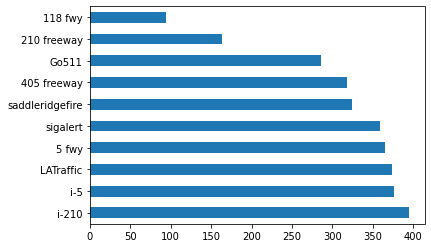

In [27]:
#the query's with the most results
df_text_query['query'].value_counts().plot(kind='barh');
plt.savefig('../plots/query with the most results.png', dpi=235)

com 1253
twitter 907
traffic 777
freeway 588
https 585
405 495
sigalert 494
la 489
http 476
10 447
pic 433
fwy 429
collision 407
lanes 392
ca 389
saddleridgefire 372
gov 356
incident 355
chp 354
ave 347


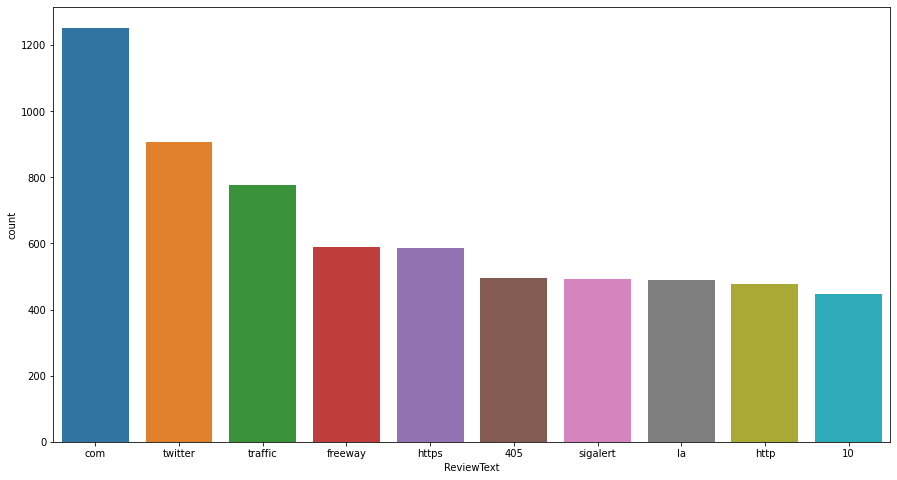

In [15]:
#top unigrams
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_text_query['text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count']).sort_values(by=['count'],ascending=False).head(10)
#df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False)
plt.figure(figsize=(15,8))
sns.barplot(x=df2['ReviewText'],y=df2['count'])

twitter com 885
pic twitter 430
ca gov 346
gov incident 336
chp ca 331
http chp 330
incident aspx 330
aspx id 330
la traffic 299
405 freeway 240
trfc collision 235
https www 224
inj http 182
https twitter 178
los angeles 159
want fwy 140
fwy text 140
new friend 139
13 number 138
number 14 138


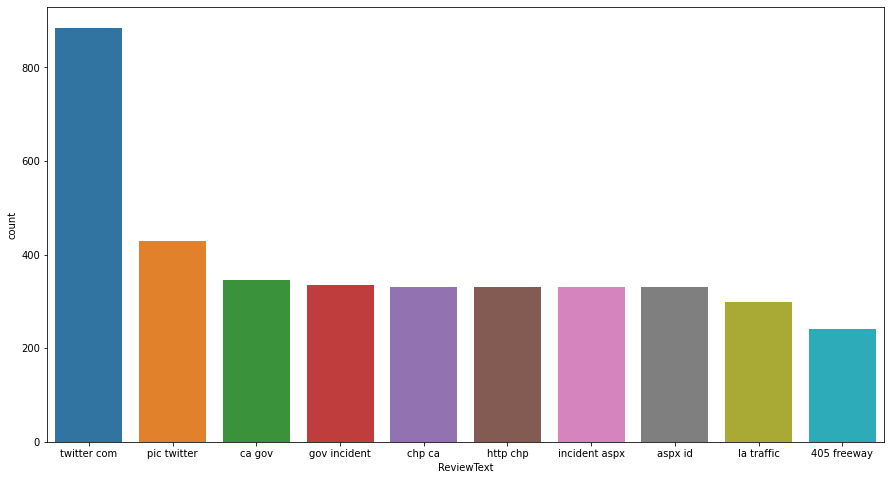

In [28]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df_text_query['text'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count']).sort_values(by=['count'],ascending=False).head(10)
#df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False)
plt.figure(figsize=(15,8))
sns.barplot(x=df4['ReviewText'],y=df4['count'])

pic twitter com 430
ca gov incident 334
chp ca gov 331
http chp ca 330
gov incident aspx 330
incident aspx id 330
inj http chp 182
https twitter com 178
want fwy text 140
13 number 14 138
fav color cute 136
ugly fav color 135
16 new friend 135
12 height 13 134
height 13 number 134
like ll dm 133
10 hmu 11 133
fwy text wanna 129
dm want fwy 123
text wanna fuck 122


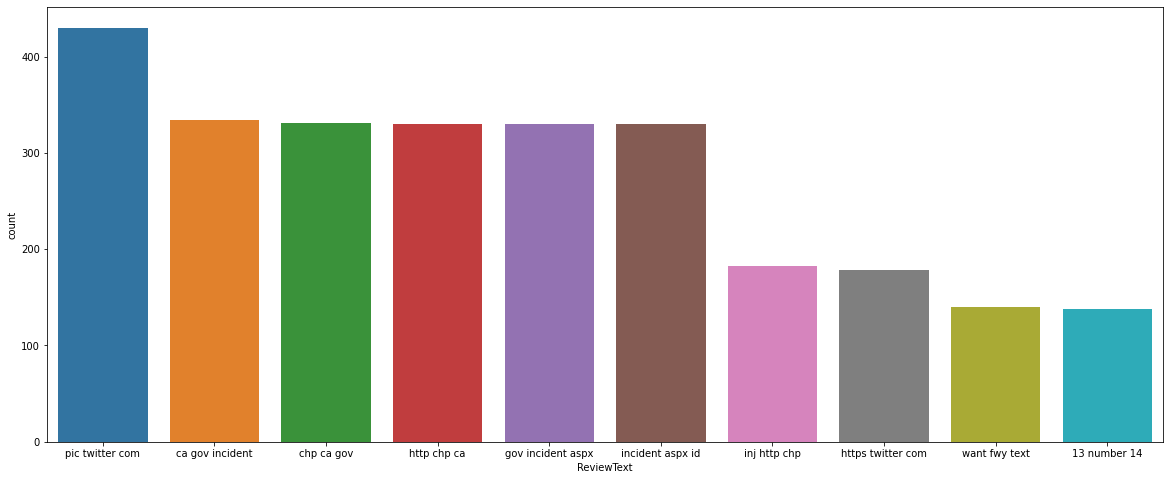

In [29]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df_text_query['text'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count']).sort_values(by=['count'],ascending=False).head(10)
#df6.groupby('ReviewText').sum()['count'].sort_values(ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x=df6['ReviewText'],y=df6['count'])

In [30]:
# Removing non-sense words from twitter data
dirty_word=['http','https','instagram','com','org','twitter','www','youtube','watch','pic']

In [31]:
re_banned_words = re.compile(r"\b(" + "|".join(dirty_word) + ")\\W", re.I)

In [32]:
def RemoveBannedWords(x):
    global re_banned_words
    return re_banned_words.sub("", x)

In [33]:
df_text_query['text'] = df_text_query['text'].apply(RemoveBannedWords)

traffic 777
freeway 588
405 495
sigalert 494
la 489
10 447
fwy 429
collision 407
lanes 392
ca 389
saddleridgefire 372
gov 356
incident 355
chp 354
ave 347
id 344
aspx 332
i210 330
210 302
blocked 267


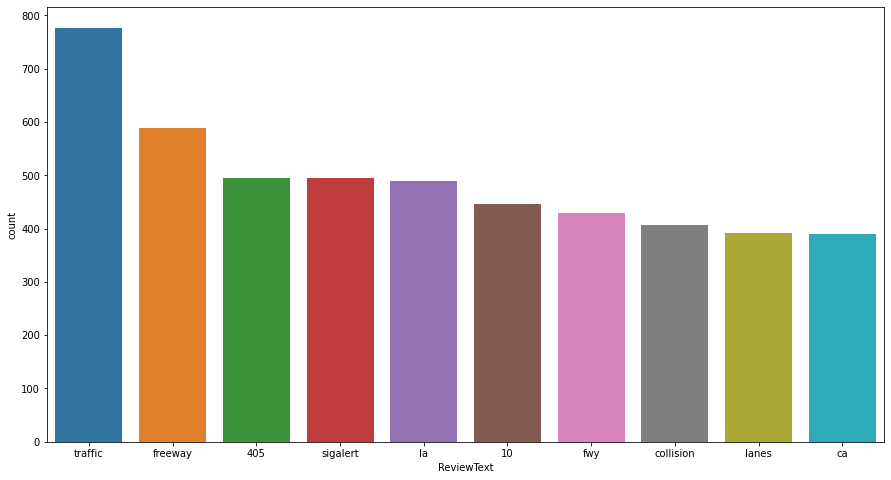

In [35]:
#top unigrams after removing non-sense words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_text_query['text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count']).sort_values(by=['count'],ascending=False).head(10)
#df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False)
plt.figure(figsize=(15,8))
sns.barplot(x=df2['ReviewText'],y=df2['count'])
plt.savefig('../plots/top unigrams in tweets.png', dpi=235)

## Google API


### A route in the area where saddle ridge fire happened is chosen as below. google is used to find the best rout from the origin todesitination. then the model is used to see whcih route option from google is the best.

<img src="../plots/p5.png" >

In [36]:
import requests

### Enter your google maps API key before running the following cells

In [ ]:
gmaps_key = 'YOUR_KEY_HERE'

In [37]:
# url with origin, destination and all the possible routes
url=f"https://maps.googleapis.com/maps/api/directions/json?origin=San+Fernando&destination=Bee+Canyon+Park&alternatives=true&key={gmaps_key}"

In [38]:
response = requests.get(url)
headlines = response.json()

In [39]:
headlines["routes"]

[{'bounds': {'northeast': {'lat': 34.3073352, 'lng': -118.4297329},
   'southwest': {'lat': 34.2659932, 'lng': -118.5103548}},
  'copyrights': 'Map data ©2020',
  'legs': [{'distance': {'text': '7.8 mi', 'value': 12548},
    'duration': {'text': '14 mins', 'value': 849},
    'end_address': 'Bee Canyon Park, 13150 Sesnon Blvd, Granada Hills, CA 91344, USA',
    'end_location': {'lat': 34.3073218, 'lng': -118.5088399},
    'start_address': 'San Fernando, CA, USA',
    'start_location': {'lat': 34.28192990000001, 'lng': -118.4390285},
    'steps': [{'distance': {'text': '26 ft', 'value': 8},
      'duration': {'text': '1 min', 'value': 3},
      'end_location': {'lat': 34.2818652, 'lng': -118.4389832},
      'html_instructions': 'Head <b>southwest</b> toward <b>Truman St.</b>',
      'polyline': {'points': 'aufpE|r{qUBABCBC'},
      'start_location': {'lat': 34.28192990000001, 'lng': -118.4390285},
      'travel_mode': 'DRIVING'},
     {'distance': {'text': '69 ft', 'value': 21},
      'd

### google suggest three route options

In [40]:
routes=[]
for i in range(len(headlines["routes"][0]["legs"][0]["steps"])):
    routes.append(headlines["routes"][0]["legs"][0]["steps"][i]["html_instructions"])

In [41]:
routes_df1 = pd.DataFrame(routes, columns = ['Text'])

In [43]:
#save the dataframe
starter_df.to_csv('../data/route_df1.csv', index=False)

In [44]:
routes=[]
for i in range(len(headlines["routes"][1]["legs"][0]["steps"])):
    routes.append(headlines["routes"][1]["legs"][0]["steps"][i]["html_instructions"])

In [45]:
routes_df2 = pd.DataFrame(routes, columns = ['Text'])

In [46]:
#save the dataframe
starter_df.to_csv('../data/route_df2.csv', index=False)

In [47]:
routes=[]
for i in range(len(headlines["routes"][2]["legs"][0]["steps"])):
    routes.append(headlines["routes"][2]["legs"][0]["steps"][i]["html_instructions"])

In [48]:
routes_df3 = pd.DataFrame(routes, columns = ['Text'])

In [49]:
#save the dataframe
starter_df.to_csv('../data/route_df3.csv', index=False)

In [50]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import regex as re
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup 
from nltk.corpus import stopwords

In [51]:
# cleaning function for google api
def text_to_words(raw_review):
    # 1. Remove HTML.
    review_text = BeautifulSoup(raw_review).get_text()
    
    # 2. Remove non-letters.
    #letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    
    # 3. Convert to lower case, split into individual words.
    words =review_text.lower().split()
    
    # 4. In Python, searching a set is much faster than searching
    # a list, so convert the stopwords to a set.
    stops = set(stopwords.words('english'))
    
    # 5. Remove stopwords.
    meaningful_words = [w for w in words if not w in stops]
    
    #6.lemmatizing
    lemmatizer = WordNetLemmatizer()
    lemmmatized_words=[lemmatizer.lemmatize(i) for i in meaningful_words]
    
    # 7. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(lemmmatized_words))

In [52]:
# Initialize an empty list to hold the clean text.
clean_text = []
total_reviews = routes_df1.shape[0]
for train_review in routes_df1 ['Text']:
    
    # Convert review to words, then append to clean_train_reviews.
    clean_text.append(text_to_words(train_review))

In [53]:
routes_df1["cleaned_text"]=clean_text

In [54]:
# Initialize an empty list to hold the clean text.
clean_text = []
total_reviews = routes_df2.shape[0]
for train_review in routes_df2 ['Text']:
    
    # Convert review to words, then append to clean_train_reviews.
    clean_text.append(text_to_words(train_review))

In [55]:
routes_df2["cleaned_text"]=clean_text

In [56]:
# Initialize an empty list to hold the clean text.
clean_text = []
total_reviews = routes_df3.shape[0]
for train_review in routes_df3 ['Text']:
    
    # Convert review to words, then append to clean_train_reviews.
    clean_text.append(text_to_words(train_review))

In [57]:
routes_df3["cleaned_text"]=clean_text

In [58]:
type(routes_df3["cleaned_text"][0].split())

list

In [59]:
# defining the list of extra words in google api
dirty_word=['head', 'toward' ,'turn','left','onto','right','continue','straight','merge','exit','stdestination','take','southwest','keep','stay']

In [60]:
re_banned_words = re.compile(r"\b(" + "|".join(dirty_word) + ")\\W", re.I)

In [61]:
def RemoveBannedWords(x):
    global re_banned_words
    return re_banned_words.sub("", x)

In [62]:
routes_df1['cleaned_text'] = routes_df1['cleaned_text'].apply(RemoveBannedWords)

In [63]:
routes_df2['cleaned_text'] = routes_df2['cleaned_text'].apply(RemoveBannedWords)

In [64]:
routes_df3['cleaned_text'] = routes_df3['cleaned_text'].apply(RemoveBannedWords)

In [65]:
route_1=[]
for i in range(len(routes_df1['cleaned_text'])):
    for k in range(len(routes_df1['cleaned_text'][i].split())):
        route_1.append(routes_df1['cleaned_text'][i].split()[k])

In [66]:
route_1

['truman',
 'st.',
 'truman',
 'st.',
 'truman',
 'st.',
 'san',
 'fernando',
 'rd',
 'ca-118',
 'w',
 'ca-118',
 'w',
 '40a',
 'balboa',
 'blvd',
 'balboa',
 'blvdpass',
 "mcdonald's",
 '(on',
 '0.5',
 'mi)',
 'westbury',
 'dr',
 'jolette',
 'ave',
 'meadowlark',
 'ave',
 'van',
 'gogh',
 'left']

In [67]:
route_2=[]
for i in range(len(routes_df2['cleaned_text'])):
    for k in range(len(routes_df2['cleaned_text'][i].split())):
        route_2.append(routes_df2['cleaned_text'][i].split()[k])

In [68]:
route_2

['truman',
 'st.',
 'truman',
 'st.',
 'truman',
 'st.pass',
 "denny's",
 '(on',
 'truman',
 'st.',
 'slightly',
 'becomes',
 'san',
 'fernando',
 'rd',
 'balboa',
 'rd',
 'balboa',
 'blvd',
 'sesnon',
 'blvd',
 'meadowlark',
 'ave',
 'van',
 'gogh',
 'left']

In [69]:
route_3=[]
for i in range(len(routes_df3['cleaned_text'])):
    for k in range(len(routes_df3['cleaned_text'][i].split())):
        route_3.append(routes_df3['cleaned_text'][i].split()[k])

In [70]:
route_3

['truman',
 'st.',
 'truman',
 'st.',
 'truman',
 'st.',
 'san',
 'fernando',
 'rd',
 'ca-118',
 'w',
 '44a',
 'i-5',
 'n',
 'sacramento',
 '159a',
 'roxford',
 'st',
 'e',
 'sylmar',
 'roxford',
 'st',
 'roxford',
 'st',
 'becomes',
 'n',
 'sepulveda',
 'blvd',
 'san',
 'fernando',
 'rd',
 'balboa',
 'rd',
 'balboa',
 'blvd',
 'sesnon',
 'blvd',
 'meadowlark',
 'ave',
 'van',
 'gogh',
 'left']

## Filtering the twitters that contain the routes words

## labeling the routes based on the words from our model

## Route 1

In [71]:
# establish list of words to search for in dataframe
    
#
road_keywords=route_1
# list of words associated with road closures
closed_keywords = ['cleared emergency',
 'construction blocked',
 'sigalert',
 'disabled',
 'maintenance',
 'close',
 'stalled car',
 'closure',
 'stop',
 'crash blocking',
 'restriction',
 'police activity',
 'closed',
 'disabled vehicle',
 'collision unkn',
 'collision unkn incident',
 'new planned construction',
 'congestion 345',
 'congestion 345 28',
 'construction',
 'cleared planned construction',
 'cleared planned',
 'construction blocked 05',
 'construction ramp',
 'expect delays',
 'emergency construction blocked',
 'emergency',
 'injuries']

to_drop = ["open", "opened", "lifted", "reopened", "clear", "cleared"]

In [72]:
# costum function to classfifed the rout as open or closed
df_text_query['is_road_closed_1']= df_text_query['text'].apply(lambda x: 1 if ((any(word in x.split() for word in road_keywords))
                                                           & (any(word in x.split() for word in closed_keywords))
                                                           & (not any(word in x.split() for word in to_drop))
                                                          ) else 0)

In [73]:
df_text_query[df_text_query['is_road_closed_1']==1]

,username,text,hashtags,query,is_road_closed_1
122,Eichler Network,residents of balboa highlands in granada hills...,['SaddleridgeFire'],saddleridgefire,1
131,Eichler Network,residents of balboa highlands in granada hills...,['SaddleridgeFire'],saddleridgefire,1
136,Eichler Network,residents of balboa highlands in granada hills...,['SaddleridgeFire'],saddleridgefire,1
175,Kyle Stokes,"at van gogh elementary, @utlanow members — inc...","['SaddleridgeFire', 'lausdpic']",saddleridgefire,1
325,Santa Barbara Divers,"chatsworth us not close to here, chatsworth is...",[],118 fwy,1
...,...,...,...,...,...
2928,scott burt,#118fwy eb yosemite ave off-ramp remains close...,"['118Fwy', 'SimiValley', 'LATraffic', 'KNXTraf...",LATraffic,1
2933,scott burt,#118fwy eb yosemite ave off-ramp closed with a...,"['118Fwy', 'LATraffic', 'KNXTraffichttps']",LATraffic,1
3003,Desmond Shaw,a sigalert for an overturned vehicle on the #1...,"['101fwy', 'KNXTraffic', 'LATraffic']",LATraffic,1
3006,Los Angeles Traffic,crash in #hollywood 101 north after normandie ...,"['Hollywood', 'latraffic']",LATraffic,1


## Route 2

In [74]:
# establish list of words to search for in dataframe

    
road_keywords=route_2


#to_drop=[]
closed_keywords = ['cleared emergency',
 'construction blocked',
 'sigalert',
 'disabled',
 'maintenance',
 'close',
 'stalled car',
 'closure',
 'stop',
 'crash blocking',
 'restriction',
 'police activity',
 'closed',
 'disabled vehicle',
 'collision unkn',
 'collision unkn incident',
 'new planned construction',
 'congestion 345',
 'congestion 345 28',
 'construction',
 'cleared planned construction',
 'cleared planned',
 'construction blocked 05',
 'construction ramp',
 'expect delays',
 'emergency construction blocked',
 'emergency',
 'injuries']

to_drop = ["open", "opened", "lifted", "reopened", "clear", "cleared"]

In [75]:
# costum function to classfifed the rout as open or closed
df_text_query['is_road_closed_2']= df_text_query['text'].apply(lambda x: 1 if ((any(word in x.split() for word in road_keywords))
                                                           & (any(word in x.split() for word in closed_keywords))
                                                           & (not any(word in x.split() for word in to_drop))
                                                          ) else 0)

In [76]:
df_text_query[df_text_query['is_road_closed_2']==1]

,username,text,hashtags,query,is_road_closed_1,is_road_closed_2
122,Eichler Network,residents of balboa highlands in granada hills...,['SaddleridgeFire'],saddleridgefire,1,1
131,Eichler Network,residents of balboa highlands in granada hills...,['SaddleridgeFire'],saddleridgefire,1,1
136,Eichler Network,residents of balboa highlands in granada hills...,['SaddleridgeFire'],saddleridgefire,1,1
175,Kyle Stokes,"at van gogh elementary, @utlanow members — inc...","['SaddleridgeFire', 'lausdpic']",saddleridgefire,1,1
325,Santa Barbara Divers,"chatsworth us not close to here, chatsworth is...",[],118 fwy,1,1
...,...,...,...,...,...,...
2928,scott burt,#118fwy eb yosemite ave off-ramp remains close...,"['118Fwy', 'SimiValley', 'LATraffic', 'KNXTraf...",LATraffic,1,1
2933,scott burt,#118fwy eb yosemite ave off-ramp closed with a...,"['118Fwy', 'LATraffic', 'KNXTraffichttps']",LATraffic,1,1
3003,Desmond Shaw,a sigalert for an overturned vehicle on the #1...,"['101fwy', 'KNXTraffic', 'LATraffic']",LATraffic,1,1
3006,Los Angeles Traffic,crash in #hollywood 101 north after normandie ...,"['Hollywood', 'latraffic']",LATraffic,1,1


## Route 3

In [77]:
# establish list of words to search for in dataframe

road_keywords=route_3
# list of words associated with road closures
closed_keywords = ['cleared emergency',
 'construction blocked',
 'sigalert',
 'disabled',
 'maintenance',
 'close',
 'stalled car',
 'closure',
 'stop',
 'crash blocking',
 'restriction',
 'police activity',
 'closed',
 'disabled vehicle',
 'collision unkn',
 'collision unkn incident',
 'new planned construction',
 'congestion 345',
 'congestion 345 28',
 'construction',
 'cleared planned construction',
 'cleared planned',
 'construction blocked 05',
 'construction ramp',
 'expect delays',
 'emergency construction blocked',
 'emergency',
 'injuries']

to_drop = ["open", "opened", "lifted", "reopened", "clear", "cleared"]

In [78]:
# costum function to classfifed the rout as open or closed
df_text_query['is_road_closed_3']= df_text_query['text'].apply(lambda x: 1 if ((any(word in x.split() for word in road_keywords))
                                                           & (any(word in x.split() for word in closed_keywords))
                                                           & (not any(word in x.split() for word in to_drop))
                                                          ) else 0)

In [79]:
df_text_query[df_text_query['is_road_closed_3']==1]

,username,text,hashtags,query,is_road_closed_1,is_road_closed_2,is_road_closed_3
122,Eichler Network,residents of balboa highlands in granada hills...,['SaddleridgeFire'],saddleridgefire,1,1,1
131,Eichler Network,residents of balboa highlands in granada hills...,['SaddleridgeFire'],saddleridgefire,1,1,1
136,Eichler Network,residents of balboa highlands in granada hills...,['SaddleridgeFire'],saddleridgefire,1,1,1
175,Kyle Stokes,"at van gogh elementary, @utlanow members — inc...","['SaddleridgeFire', 'lausdpic']",saddleridgefire,1,1,1
317,Jeffrey Prang,the assessor’s office is here to help! if you’...,"['SaddleRidgeFire', 'disaster']",saddleridgefire,0,0,1
...,...,...,...,...,...,...,...
2928,scott burt,#118fwy eb yosemite ave off-ramp remains close...,"['118Fwy', 'SimiValley', 'LATraffic', 'KNXTraf...",LATraffic,1,1,1
2933,scott burt,#118fwy eb yosemite ave off-ramp closed with a...,"['118Fwy', 'LATraffic', 'KNXTraffichttps']",LATraffic,1,1,1
3003,Desmond Shaw,a sigalert for an overturned vehicle on the #1...,"['101fwy', 'KNXTraffic', 'LATraffic']",LATraffic,1,1,1
3006,Los Angeles Traffic,crash in #hollywood 101 north after normandie ...,"['Hollywood', 'latraffic']",LATraffic,1,1,1


In [80]:
print(f'the number of tweets that shows rout 1 is closed : {sum(df_text_query["is_road_closed_1"])}')
print(f'the number of tweets that shows rout 2 is closed : {sum(df_text_query["is_road_closed_2"])}')      
print(f'the number of tweets that shows rout 3 is closed : {sum(df_text_query["is_road_closed_3"])}') 

the number of tweets that shows rout 1 is closed : 138
the number of tweets that shows rout 2 is closed : 133
the number of tweets that shows rout 3 is closed : 182


#### The conclusion that we can get from the above results shows using free ways during disaters is not a good idea for rescue teams and they should be familiar with local routes to get to the disaster region.